Fashion Retail Sales: Analysis and Forecasting
Table of Contents:
1. Data Loading
2. Data Cleaning and Preprocessing (STYLING)
3. Exploratory Data Analysis
4. Customers Segments & Satisfaction Levels
5. Root Cause Analysis
6. Business Insights
  6.1) Top 10 Customers
  6.2) Top 10 Item Purchased
  6.3) Total Profit: 2022 Vs 2023
7. Average Review Rating: 2022 Vs 2023
8. Summary

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "vscode" 

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

1. DATA LOADING

In [38]:
df=pd.read_csv(r'C:\Users\LARISSA\Documents\TUTORIALPY\Fashion_Retail_Sales.csv') 
print(df.head(10))                               

   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    2023-02-05   
1                   4115          Tunic                 2456.0    2023-07-11   
2                   4019       Tank Top                 2102.0    2023-03-23   
3                   4097       Leggings                 3126.0    2023-03-15   
4                   3997         Wallet                 3003.0    2022-11-27   
5                   4080         Onesie                 2914.0    2022-12-11   
6                   4055         Jacket                 2571.0    2023-07-08   
7                   3973       Trousers                 2419.0    2022-11-10   
8                   4044          Jeans                 4771.0    2023-05-19   
9                   4010        Loafers                 4233.0    2023-06-11   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1 

2. Data Cleaning and Preprocessing (STYLING)

In [5]:
styled_df = df.style.set_table_styles([{'selector': 'th', 'props': [('background', 'lightgrey')]}])
styled_df

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.000000,2023-02-05,nan,Credit Card
1,4115,Tunic,2456.000000,2023-07-11,2.000000,Credit Card
2,4019,Tank Top,2102.000000,2023-03-23,4.100000,Cash
3,4097,Leggings,3126.000000,2023-03-15,3.200000,Cash
4,3997,Wallet,3003.000000,2022-11-27,4.700000,Cash
5,4080,Onesie,2914.000000,2022-12-11,4.500000,Credit Card
6,4055,Jacket,2571.000000,2023-07-08,1.300000,Cash
7,3973,Trousers,2419.000000,2022-11-10,4.600000,Cash
8,4044,Jeans,4771.000000,2023-05-19,4.100000,Cash
9,4010,Loafers,4233.000000,2023-06-11,nan,Credit Card


In [6]:
df.sample(7)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
2807,4073,Leggings,115.0,2023-06-25,2.6,Credit Card
155,4028,Cardigan,33.0,2023-02-11,4.3,Credit Card
1497,4060,T-shirt,55.0,2023-07-12,4.5,Credit Card
3362,4016,Flannel Shirt,22.0,2022-11-27,1.4,Credit Card
1857,4039,Jumpsuit,NaN,2023-06-06,2.1,Credit Card
2160,4088,Belt,134.0,2023-02-14,4.5,Cash
655,4032,Shorts,39.0,2023-03-15,3.5,Credit Card


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [8]:
structure_summary = pd.DataFrame({'Data Type': df.dtypes, 
                                  'Non-Null Count': df.count(), 
                                  'Missing Values': df.isnull().sum()})

# Create a Styler object to apply formatting
styled_summary = structure_summary.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})

In [9]:
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid')]}
])

In [10]:
display(styled_summary)

,Data Type,Non-Null Count,Missing Values
Customer Reference ID,int64,3400,0
Item Purchased,object,3400,0
Purchase Amount (USD),float64,2750,650
Date Purchase,object,3400,0
Review Rating,float64,3076,324
Payment Method,object,3400,0


In [11]:
df.dtypes

Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object

In [13]:
print(f'Records: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')
print(f'Column Names: {df.columns.tolist()}')

Records: 3400
Columns: 6
Column Names: ['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)', 'Date Purchase', 'Review Rating', 'Payment Method']


In [14]:
#Check for nulls and missing values
df.isnull().sum()
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
styled_null_summary = null_summary.style.background_gradient(cmap='Reds', subset=['Null Percentage'])
styled_null_summary


,Null Count,Null Percentage
Customer Reference ID,0,0.000000
Item Purchased,0,0.000000
Purchase Amount (USD),650,19.117647
Date Purchase,0,0.000000
Review Rating,324,9.529412
Payment Method,0,0.000000


In [ ]:
#Logically drop Purchase Amount Missing Values
df = df.dropna(subset=['Purchase Amount (USD)'])


In [16]:
#Review Rating Missing Values can be filled with the average rating values
average_rating = df['Review Rating'].mean()
df['Review Rating'] = df['Review Rating'].fillna(average_rating)

C:\Users\LARISSA\AppData\Local\Temp\ipykernel_11620\220687267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Rating'] = df['Review Rating'].fillna(average_rating)


In [17]:
# Generate summary statistics using describe()
summary_stats = df.describe()

# Create a Styler object to apply formatting
styled_summary = summary_stats.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})

In [18]:
# Apply additional CSS styling to the Styler object
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid')]}
])
# Display the styled summary statistics
styled_summary

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,2750.000000,2750.000000,2750.000000
mean,4039.873818,156.709818,2.986248
std,48.513574,419.536669,1.094264
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.100000
50%,4041.000000,110.000000,2.986248
75%,4081.000000,155.750000,3.900000
max,4122.000000,4932.000000,5.000000


In [19]:
# Create a Styler object to apply formatting
summary_stats = df.describe().transpose()

# Create a Styler object to apply formatting
styled_summary = summary_stats.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})

# Apply additional CSS styling to the Styler object
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f2f2f2'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid'),
                                  ('background-color', '#8bb8f2'), ('color', '#ffffff')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid'),
                                  ('background-color', '#ffffff'), ('color', '#555555')]}
])

# Display the styled summary statistics table
styled_summary

,count,mean,std,min,25%,50%,75%,max
Customer Reference ID,2750.000000,4039.873818,48.513574,3957.000000,3997.000000,4041.000000,4081.000000,4122.000000
Purchase Amount (USD),2750.000000,156.709818,419.536669,10.000000,57.000000,110.000000,155.750000,4932.000000
Review Rating,2750.000000,2.986248,1.094264,1.000000,2.100000,2.986248,3.900000,5.000000


In [20]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
Customer Reference ID,int64,0,0.000000,166,2750
Item Purchased,object,0,0.000000,50,2750
Purchase Amount (USD),float64,0,0.000000,234,2750
Date Purchase,object,0,0.000000,365,2750
Review Rating,float64,0,0.000000,42,2750
Payment Method,object,0,0.000000,2,2750


3. Exploratory Data Analysis

In [ ]:

df['Customer Reference ID'].duplicated().sum()



np.int64(2584)

In [24]:
df['Customer Reference ID'].value_counts()

Customer Reference ID
4122    28
4078    28
4075    25
3973    25
4065    24
        ..
4097     8
4101     8
4046     8
4112     7
4079     6
Name: count, Length: 166, dtype: int64

In [25]:
value_counts = df['Item Purchased'].value_counts()

In [46]:
# Create a Plotly table
table = go.Table(
    header=dict(values=["Category", "Count"],
                fill_color='black',
                font=dict(color='white')),
    cells=dict(values=[value_counts.index, value_counts.values],
               fill_color='black',
               font=dict(color='white')),
    columnwidth=[120, 80],
    header_align=['center', 'center'],
    cells_align=['center', 'center']
)

In [56]:
# Define the table layout and display it
layout = go.Layout(
    width=800,
    height=400,
    margin=dict(l=50, r=50, t=50, b=50),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig = go.Figure(data=[table], layout=layout)
fig.show()

In [57]:
data = go.Bar(
    x=value_counts.values,
    y=value_counts.index,
    orientation='h',
    marker=dict(color='rgba(200, 200, 200, 1.0)')
)

layout = go.Layout(
    title='Item Purchased Counts',
    xaxis=dict(title='Count'),
    yaxis=dict(title='Items'),
    plot_bgcolor='rgb(0, 0, 0)'
)

fig = go.Figure(data=[data], layout=layout)

# Display the chart
fig.show()

In [47]:
# Convert 'Date Purchase' to datetime
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

In [48]:
# Sort the dataframe by date
df.sort_values('Date Purchase', inplace=True)

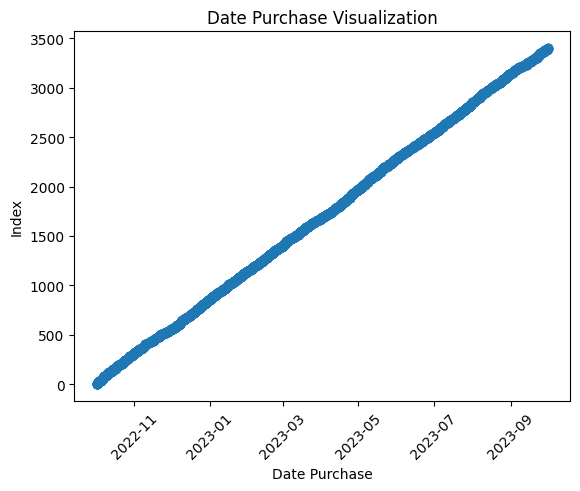

In [49]:
# Plotting
plt.plot(df['Date Purchase'], range(df.shape[0]), marker='o')
plt.xlabel('Date Purchase')
plt.ylabel('Index')
plt.title('Date Purchase Visualization')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the visual
plt.show()

In [58]:
# Creating the boxplot
fig = px.box(df, y='Purchase Amount (USD)')
fig.show()

In [59]:
# Calculate the mean and standard deviation
mean = df['Purchase Amount (USD)'].mean()
std = df['Purchase Amount (USD)'].std()

# Define the lower and upper bounds for outliers
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Find the outliers
outliers = df[(df['Purchase Amount (USD)'] < lower_bound) | (df['Purchase Amount (USD)'] > upper_bound)]

In [60]:
from IPython.display import display, HTML

# Add styling to outliers DataFrame
styled_outliers = outliers.style.apply(lambda x: ['background:  #000000' if v < lower_bound or v > upper_bound else '' for v in x], axis=1)

# Display outliers as an HTML table
display(HTML(outliers.to_html()))

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
33,4110,Hoodie,2653.0,2022-10-11,4.2,Credit Card
26,4099,Blazer,4232.0,2022-10-25,2.7,Credit Card
7,3973,Trousers,2419.0,2022-11-10,4.6,Cash
11,4067,Bowtie,4418.0,2022-11-21,3.4,Cash
19,4103,Romper,4465.0,2022-11-21,NaN,Credit Card
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash
12,4068,Pajamas,3728.0,2022-12-09,NaN,Credit Card
5,4080,Onesie,2914.0,2022-12-11,4.5,Credit Card
34,3984,Sweater,4859.0,2022-12-19,5.0,Cash
23,4109,Flip-Flops,4932.0,2022-12-20,4.0,Credit Card


In [61]:
# Remove outliers from the DataFrame
df = df[(df['Purchase Amount (USD)'] >= lower_bound) & (df['Purchase Amount (USD)'] <= upper_bound)]

In [62]:
# Creating the boxplot
fig = px.box(df, y='Purchase Amount (USD)')

# Displaying the plot
fig.show()

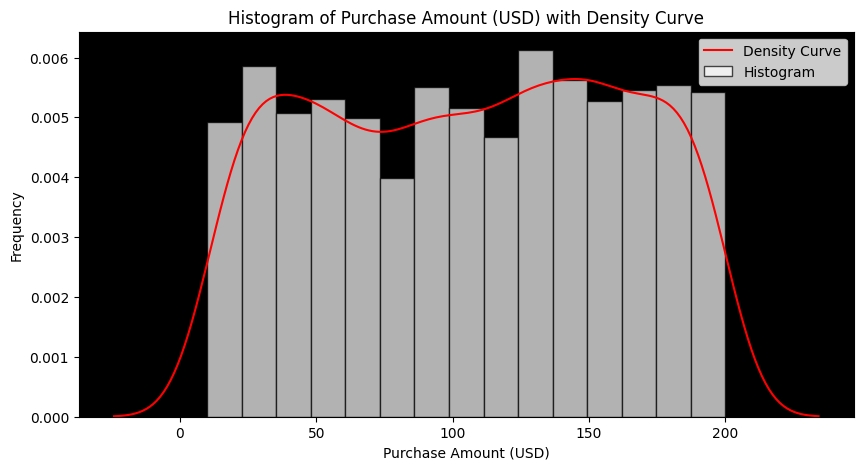

In [65]:
df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')
df = df.dropna(subset=['Purchase Amount (USD)'])

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('black')
# Histogram
ax.hist(df['Purchase Amount (USD)'], bins=15, edgecolor='black',
        alpha=0.7, color='white', density=True)

# KDE Curve
sns.kdeplot(df['Purchase Amount (USD)'], color='red', ax=ax)

# Etiquetas y título
ax.set_xlabel('Purchase Amount (USD)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Purchase Amount (USD) with Density Curve')

# Leyend
ax.legend(['Density Curve', 'Histogram'])

plt.show()

In [66]:
fig = px.scatter(df, x='Date Purchase', y='Purchase Amount (USD)', color='Item Purchased',
                 title='Purchase Amount Over Time', labels={'Purchase Amount (USD)': 'Purchase Amount'})
fig.show()

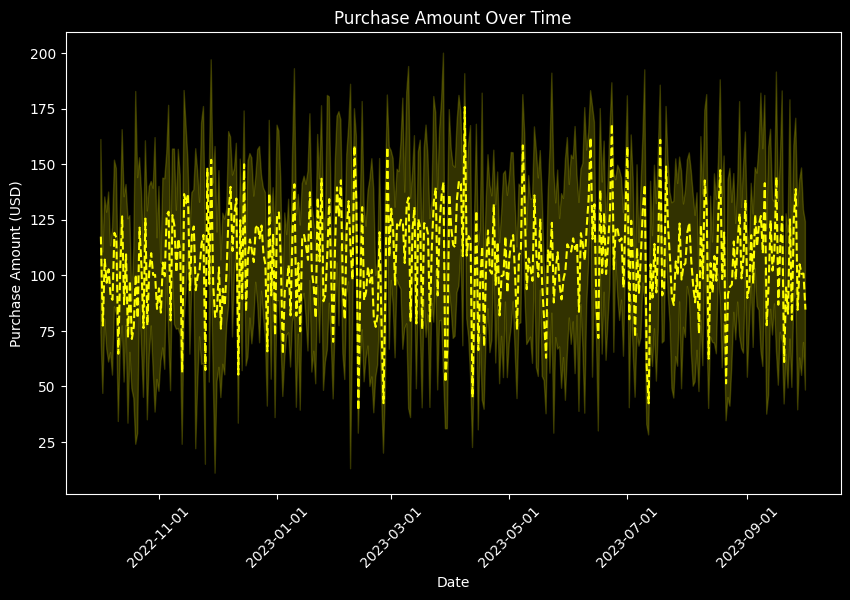

In [67]:
import matplotlib.dates as mdates

# Set the plot background to dark black
plt.style.use('dark_background')

# Create the line chart using Seaborn with dashed linestyle
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date Purchase', y='Purchase Amount (USD)', color='yellow', linestyle='--')

plt.title('Purchase Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Purchase Amount (USD)')

# Rotate x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Format x-axis dates as 'YYYY-MM-DD'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

In [68]:
review_rating = df['Review Rating'].value_counts(bins = 5).sort_index()

In [69]:
review_rating_table = pd.DataFrame(review_rating)
review_rating_table.columns = ['Count']
review_rating_table.index.name = 'Rating Range'

table_style = [
    {'selector': 'th', 'props': [('background-color', '#AED6F1'), ('color', 'white')]},  # Header color
    {'selector': 'td', 'props': [('background-color', '#D6EAF8')]}   # Cell color
]

# Apply the style to the table
styled_table = review_rating_table.style.set_table_styles(table_style)

# Display the styled table
display(styled_table)

,Count
Rating Range,
"(0.995, 1.8]",537
"(1.8, 2.6]",490
"(2.6, 3.4]",502
"(3.4, 4.2]",486
"(4.2, 5.0]",438


In [77]:
# Create a histogram with dark theme
fig = px.histogram(df, x='Review Rating', nbins=6, title='Distribution of Review Ratings')
fig.update_layout(
    xaxis_title='Rating',
    yaxis_title='Frequency',
    template='plotly_dark'
)

fig.update_traces(marker=dict(color='turquoise'))

fig.show()

In [72]:
# Calculate the value counts and percentages
payment_counts = df["Payment Method"].value_counts(normalize=True) * 100

In [73]:
# Create a DataFrame with the value counts and percentages
payment_stats = pd.DataFrame({
    "Payment Method": payment_counts.index,
    "Count": payment_counts.values,
    "Percentage (%)": payment_counts.values.round(2)
})

In [74]:
from IPython.display import display

# Styling the DataFrame
styled_table = payment_stats.style.format({"Percentage (%)": "{:.2f}%"}).background_gradient(cmap='Blues')

# Display the styled table
display(styled_table)

,Payment Method,Count,Percentage (%)
0,Credit Card,52.234946,52.23%
1,Cash,47.765054,47.77%


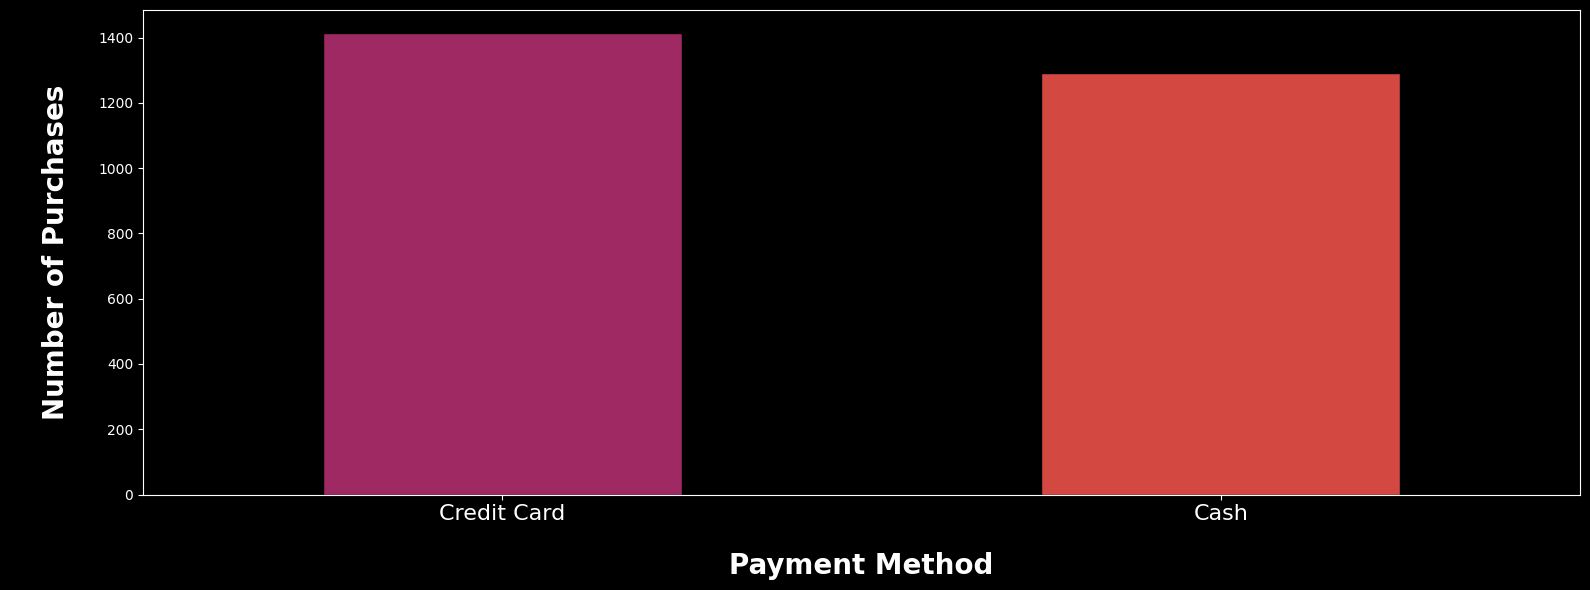

In [75]:
plt.figure(figsize = (16, 6))

df["Payment Method"].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno')[2:4], edgecolor = 'black')
plt.xlabel('Payment Method', weight = "bold", color = "white", fontsize = 20, labelpad = 20)
plt.ylabel('\nNumber of Purchases', weight = "bold", color = "white", fontsize = 20, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)

plt.tight_layout()
plt.show()

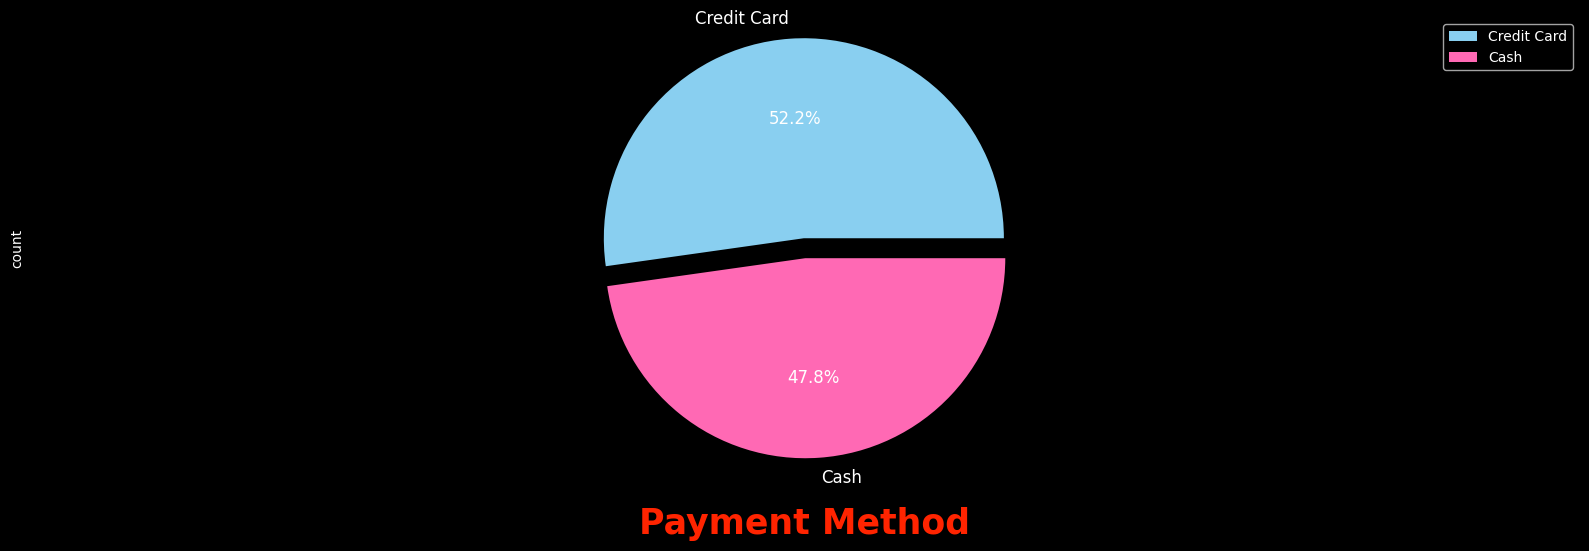

In [78]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Payment Method', weight = "bold", color = "#ff2400", fontsize = 25, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

4. Customers Segments & Satisfaction Levels

In [79]:
# Define the customer segments based on satisfaction levels
df['Satisfaction_Score'] = pd.cut(df['Review Rating'], bins=[0, 2.99, 3.99, 5], labels=['Dissatisfied', 'Neutral', 'Satisfied'])

# Analyze the characteristics of each segment
segment_analysis = df.groupby('Satisfaction_Score').agg({'Item Purchased': 'count', 'Purchase Amount (USD)': 'mean'})

C:\Users\LARISSA\AppData\Local\Temp\ipykernel_11620\3065614330.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [80]:
# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Satisfaction Score', 'Count of Items Purchased', 'Average Purchase Amount (USD)'],
                fill_color='lightgrey',
                align='left'),
    cells=dict(values=[
        segment_analysis.index,
        segment_analysis['Item Purchased'],
        segment_analysis['Purchase Amount (USD)'].round(2)],
        fill_color='white',
        align='left'))
])

# Add title and adjust layout
fig.update_layout(title='Customer Segment Analysis',
                  title_x=0.5,
                  autosize=True)

# Display the table
fig.show()

5. Root Cause Analysis

<Axes: xlabel='Review Rating', ylabel='Purchase Amount (USD)'>

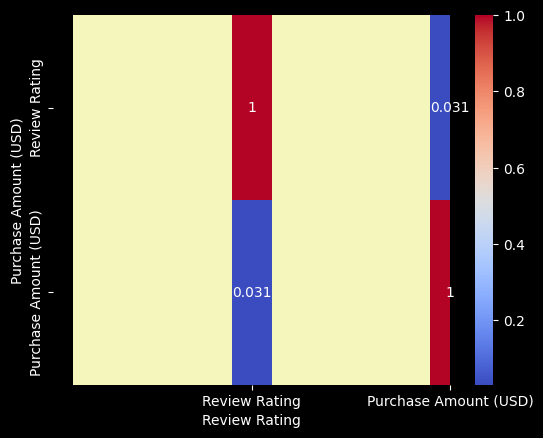

In [81]:
# Correlation analysis
correlation_matrix = df[['Review Rating', 'Purchase Amount (USD)']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Scatter plot of Review Rating vs. Purchase Amount
sns.scatterplot(data=df, x='Review Rating', y='Purchase Amount (USD)')

# Bar plot of average Review Rating by Payment Method
sns.barplot(data=df, x='Payment Method', y='Review Rating', errorbar=None)

6. Business Insights

6.1) Top 10 Customers

In [82]:
# Calculate total purchase amount for each customer
customer_totals = df.groupby('Customer Reference ID')['Purchase Amount (USD)'].sum().reset_index()

# Sort the customers by their total purchase amount in descending order and get the top 10
top_10_customers = customer_totals.nlargest(10, 'Purchase Amount (USD)')

In [83]:
# Create a Plotly figure with a table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Customer Reference ID', 'Purchase Amount (USD)'],
                fill_color='turquoise',
                align='left'),
    cells=dict(values=[top_10_customers['Customer Reference ID'], top_10_customers['Purchase Amount (USD)']],
               fill_color='lavender',
               align='left'))
])

# Update the layout of the table
fig.update_layout(title='Top 10 Customers by Purchase Amount')

# Display the table
fig.show()

6.2) Top 10 Items Purchased

In [84]:
top_10_items = df['Item Purchased'].value_counts().head(10)

In [85]:
# Create the table trace with blue color
table_trace = go.Table(
    header=dict(values=['Item Purchased', 'Count'], 
                fill=dict(color='black'), 
                font=dict(color='white')),
    cells=dict(values=[top_10_items.index, top_10_items.values], 
               fill=dict(color='black'), 
               font=dict(color='white'))
)
# Create the figure
fig = go.Figure(data=[table_trace])

# Update the figure layout
fig.update_layout(
    title='Top 10 Items Purchased',
    height=400,
    width=600
)

# Show the figure
fig.show()

6.3) Total Profit: 2022 Vs 2023

In [86]:
# Filter the dataset for the year 2022 and 2023
df_2022 = df[df['Date Purchase'].dt.year == 2022]
df_2023 = df[df['Date Purchase'].dt.year == 2023]

# Calculate the total profit for 2022 and 2023
total_profit_2022 = df_2022['Purchase Amount (USD)'].sum()
total_profit_2023 = df_2023['Purchase Amount (USD)'].sum()

In [87]:
header = ['Year', 'Total Profit']
data = [['2022', total_profit_2022], ['2023', total_profit_2023]]


table = go.Table(
    header=dict(values=header, fill=dict(color='black'), font=dict(color='white')),
    cells=dict(values=list(zip(*data)), fill=dict(color='black'), font=dict(color='white'))
)

# Create a layout for the table
layout = dict(title='Total Profit comparison for 2022 and 2023',
              width=500,
              height=300,
              paper_bgcolor='black',
              font=dict(color='white')
)

# Create a figure and add the table
fig = go.Figure(data=[table], layout=layout)

# Display the figure
fig.show()

7. Average Review Rating: 2022 Vs 2023

In [89]:
# Calculate the average review rating for 2022 and 2023
avg_rating_2022 = df_2022['Review Rating'].mean()
avg_rating_2023 = df_2023['Review Rating'].mean()

In [90]:
# Create a table for the business insights
data = [['2022', avg_rating_2022],
        ['2023', avg_rating_2023]]
headers = ['Year', 'Average Review Rating']
table = go.Table(
    header=dict(values=headers),
    cells=dict(values=list(zip(*data)))
)

In [91]:
# Create a layout for the table
layout = dict(title='Average Review Rating for 2022 and 2023',
              width=500,
              height=300)

# Create a figure and add the table
fig = go.Figure(data=[table], layout=layout)

# Display the figure
fig.show()

8. Summary

Top Performing Products

The most frequently purchased items demonstrate strong consumer preference for casual and versatile apparel:
Shorts lead with 73 purchases, followed closely by Pants and Skirts (70 each).
Accessories category shows strength with Belts at 68 purchases.
Topwear items (Tank Tops, T-shirts, Camisoles) maintain consistent performance.
The product mix indicates a well-balanced inventory across different clothing categories.

Remarkable Financial Growth

The company experienced exceptional profitability improvement:
2023 Total Profit: $217,044 vs 2022 Total Profit: $70,756
206% year-over-year profit increase - more than tripling profitability
This represents one of the most significant growth trajectories in retail

Customer Experience Enhancement

Review ratings show moderate but meaningful improvement:
2023 Average Rating: 2.99 vs 2022 Average Rating: 2.95
While still below the 3.0 threshold, the upward trend indicates service quality improvements
The improvement aligns with the substantial profit growth, suggesting better customer value delivery

Key Business Implications

1. Product Strategy Success: The top-selling items (Shorts, Pants, Skirts) should remain inventory priorities.

2. Operational Excellence: The massive profit growth suggests improved operational efficiency, pricing strategy, or cost management.

3. Customer Satisfaction Correlation: The simultaneous improvement in both profits and ratings indicates a sustainable business model.

4. Growth Momentum: The 206% profit increase positions the company for accelerated market expansion.

Strategic Recommendations

1. Capitalize on Top Performers: Increase marketing around best-selling categories
2. Maintain Growth Trajectory: Investigate and replicate the factors driving the 2023 success
3. Focus on Quality: Continue improving customer experience to push ratings above 3.0
4. Scale Operations: Consider expansion opportunities given the strong financial performance

The data reveals a company in a powerful growth phase with improving customer satisfaction and dominant product categories, suggesting a very positive outlook for future performance.

